In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from highlight_text import fig_text
from mplsoccer import PyPizza, FontManager
from PIL import Image

In [35]:
df=pd.read_html('https://fbref.com/stathead/player_comparison.cgi?request=1&sum=0&comp_type=spec&spec_comps=big_5&player_id1=dc7f8a28&p1yrfrom=2023-2024&player_id2=bc7dc64d&p2yrfrom=2023-2024&player_id3=ed1e53f3&p3yrfrom=2023-2024', 
                attrs={"id":"standard_stats"})[0]

In [36]:
df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Player               Span             Nation                Pos   
0        Cole Palmer            2023-24            eng ENG                 MF   
1        Bukayo Saka            2023-24            eng ENG                 FW   
2         Phil Foden            2023-24            eng ENG              FW,MF   

  Unnamed: 4_level_0 Playing Time                    Performance  ...  \
               Squad           MP Starts   Min   90s         Gls  ...   
0           2 squads           34     29  2618  29.1          22  ...   
1            Arsenal           35     35  2919  32.4          16  ...   
2    Manchester City           35     33  2857  31.7          19  ...   

  Per 90 Minutes                                                             
             Gls   Ast   G+A  G-PK G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG  
0           0.76  0.38  1.13  0.45   0.83  0.63  0.38   1.01  0.38     0.76  
1           0.49  0.28  0.77  0.31   0.59  0.48  0.32   0.80  0.33     0.65  
2           0.60  0.25  0.85  0.60   0.85  0.33  0.26   0.59  0.33     0.59  

[3 rows x 34 columns]

In [39]:
df.columns

MultiIndex([('Unnamed: 0_level_0',   'Player'),
            ('Unnamed: 1_level_0',     'Span'),
            ('Unnamed: 2_level_0',   'Nation'),
            ('Unnamed: 3_level_0',      'Pos'),
            ('Unnamed: 4_level_0',    'Squad'),
            (      'Playing Time',       'MP'),
            (      'Playing Time',   'Starts'),
            (      'Playing Time',      'Min'),
            (      'Playing Time',      '90s'),
            (       'Performance',      'Gls'),
            (       'Performance',      'Ast'),
            (       'Performance',      'G+A'),
            (       'Performance',     'G-PK'),
            (       'Performance',       'PK'),
            (       'Performance',    'PKatt'),
            (       'Performance',     'CrdY'),
            (       'Performance',     'CrdR'),
            (          'Expected',       'xG'),
            (          'Expected',     'npxG'),
            (          'Expected',      'xAG'),
            (          'Expected', 'npxG

In [41]:
#Drop top header row of the Unnamed, Playing Time, performance and per 90
df.columns=df.columns.droplevel(0)

In [43]:
df

,Player,Span,Nation,Pos,Squad,MP,Starts,Min,90s,Gls,...,Gls,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG
0,Cole Palmer,2023-24,eng ENG,MF,2 squads,34,29,2618,29.1,22,...,0.76,0.38,1.13,0.45,0.83,0.63,0.38,1.01,0.38,0.76
1,Bukayo Saka,2023-24,eng ENG,FW,Arsenal,35,35,2919,32.4,16,...,0.49,0.28,0.77,0.31,0.59,0.48,0.32,0.80,0.33,0.65
2,Phil Foden,2023-24,eng ENG,"FW,MF",Manchester City,35,33,2857,31.7,19,...,0.60,0.25,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59


In [45]:
df=df.drop(['90s', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY',
       'CrdR', 'npxG+xAG'], axis=1)

In [47]:
df

,Player,Span,Nation,Pos,Squad,MP,Starts,Min,Gls,Ast,...,PrgC,PrgP,PrgR,Gls,Ast,G+A-PK,xG,xAG,xG+xAG,npxG
0,Cole Palmer,2023-24,eng ENG,MF,2 squads,34,29,2618,22,11,...,117,197,195,0.76,0.38,0.83,0.63,0.38,1.01,0.38
1,Bukayo Saka,2023-24,eng ENG,FW,Arsenal,35,35,2919,16,9,...,155,126,508,0.49,0.28,0.59,0.48,0.32,0.80,0.33
2,Phil Foden,2023-24,eng ENG,"FW,MF",Manchester City,35,33,2857,19,8,...,93,168,269,0.60,0.25,0.85,0.33,0.26,0.59,0.33


In [49]:
df.columns

Index(['Player', 'Span', 'Nation', 'Pos', 'Squad', 'MP', 'Starts', 'Min',
       'Gls', 'Ast', 'xG', 'npxG', 'xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls', 'Ast',
       'G+A-PK', 'xG', 'xAG', 'xG+xAG', 'npxG'],
      dtype='object')

In [55]:
params=[
     'Goals', 'Assists', 'Expected Goals\nxG', 'Non-Penalty\n Expected Goals\n npxG', 'Expected Assisted\n Goals\nxAG', 'npxG+xAG', 'Progressive Carries\n PrgC', 'Progressive Passes\n PrgP',
       'Progressive Passes\nReceived\nPrgR']

values=[
    22,11,18.2,11.1,11.1,22.2,117,197,195] #Cole Palmer
values_2=[
    16,9,15.5,10.8,10.5,21.2,155,126,508] #Bukayo Saka
values_3=[
    19,8,10.3,10.3,8.4,18.7,93,168,269] #Phil Foden

In [127]:
#Minimum and maximum range values for parameters
min_range=[15,7,8,8,7,15,80,100,100]
max_range=[25,15,25,15,15,25,170,220,300]

In [137]:
#Instatiate PyPizza class
baker = PyPizza(
    params=params,
    min_range=min_range,        # min range values
    max_range=max_range,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, other_circle_lw=0,
    other_circle_color="#000000", straight_line_lw=1
)

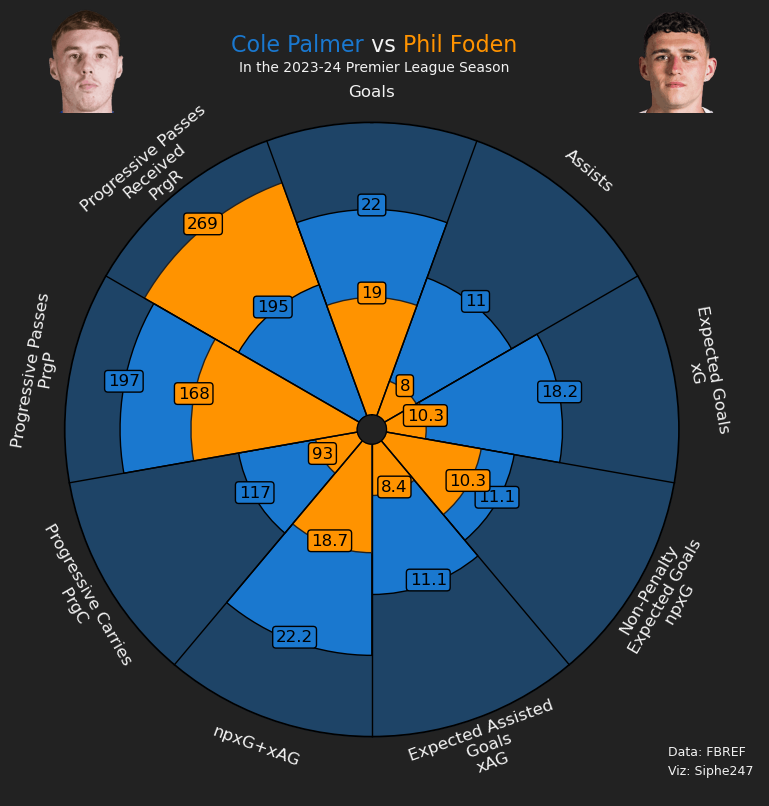

In [165]:
##Plot pizza
fig, ax = baker.make_pizza(
    values,                     # list of values
    compare_values=values_3,    # passing comparison values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="#ff9300", edgecolor="#222222", zorder=3, linewidth=1,
    ),                          # values to be used when plotting comparison slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=12, zorder=5, #Colours of the parameters
        va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                           # values to be used when adding parameter-values
    kwargs_compare_values=dict(
        color="#000000", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#FF9300",
            boxstyle="round,pad=0.2", lw=1
        )
    )                            
)


#Add title
fig_text(
    0.515, 0.99, "<Cole Palmer> vs <Phil Foden>",
    size=16, fig=fig,
    highlight_textprops=[{"color": '#1A78CF'}, {"color": '#FF9300'}],
    ha="center",color="#F2F2F2"
)

#Add subtitle
fig.text(
    0.515, 0.942, "In the 2023-24 Premier League Season",
    size=10,
    ha="center", color="#F2F2F2"
)

#Add player images
ax2 = fig.add_axes([.09,0.89,.13,.13])
ax2.axis('off')
img = Image.open('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Palmer.png')
ax2.imshow(img)
ax=fig.add_axes([.83,0.89,.13,.13])
ax.axis('off')
img3=Image.open('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Foden.png')
ax.imshow(img3)

#Add credits
CREDIT_1="Data: FBREF"
CREDIT_2="Viz: Siphe247"

fig_text(
    0.99, 0.1, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="#F2F2F2",
    ha="right"
)

plt.savefig('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Palmer vs Foden 23-24.png', dpi=300, bbox_inches='tight')

In [199]:
#Minimum and maximum range values for parameters
min_range=[15,7,8,10,7,15,80,100,100]
max_range=[25,15,5,12,15,25,170,220,600]

In [201]:
#Instatiate PyPizza class
baker = PyPizza(
    params=params,
    min_range=min_range,        # min range values
    max_range=max_range,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, other_circle_lw=0,
    other_circle_color="#000000", straight_line_lw=1
)

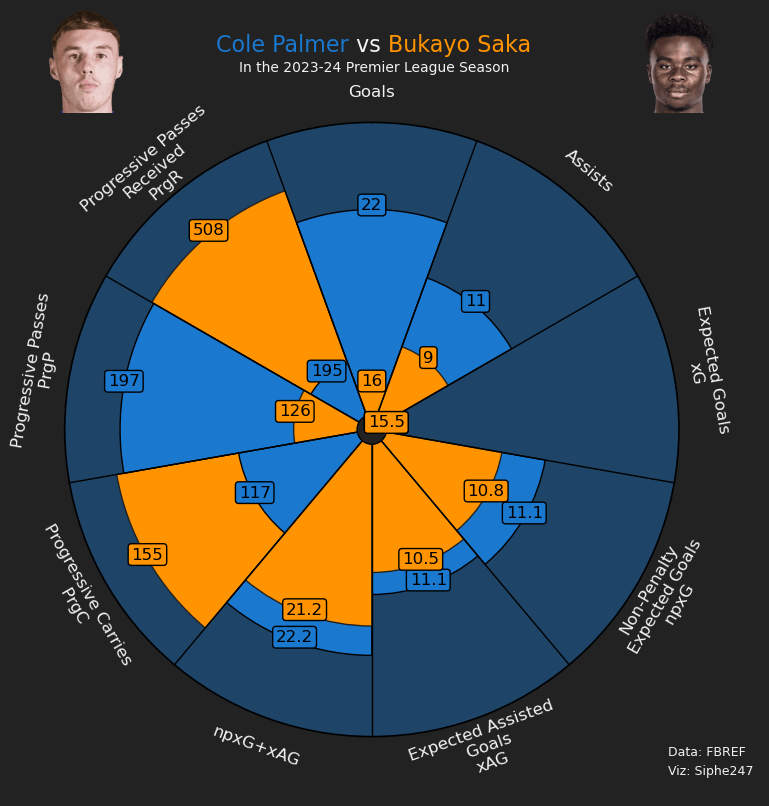

In [203]:
##Plot pizza
fig, ax = baker.make_pizza(
    values,                     # list of values
    compare_values=values_2,    # passing comparison values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="#ff9300", edgecolor="#222222", zorder=3, linewidth=1,
    ),                          # values to be used when plotting comparison slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=12, zorder=5, #Colours of the parameters
        va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                           # values to be used when adding parameter-values
    kwargs_compare_values=dict(
        color="#000000", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#FF9300",
            boxstyle="round,pad=0.2", lw=1
        )
    )                            
)


#Add title
fig_text(
    0.515, 0.99, "<Cole Palmer> vs <Bukayo Saka>",
    size=16, fig=fig,
    highlight_textprops=[{"color": '#1A78CF'}, {"color": '#FF9300'}],
    ha="center",color="#F2F2F2"
)

#Add subtitle
fig.text(
    0.515, 0.942, "In the 2023-24 Premier League Season",
    size=10,
    ha="center", color="#F2F2F2"
)

#Add player images
ax2 = fig.add_axes([.09,0.89,.13,.13])
ax2.axis('off')
img = Image.open('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Palmer.png')
ax2.imshow(img)
ax=fig.add_axes([.83,0.89,.13,.13])
ax.axis('off')
img3=Image.open('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Saka.png')
ax.imshow(img3)

#Add credits
CREDIT_1="Data: FBREF"
CREDIT_2="Viz: Siphe247"

fig_text(
    0.99, 0.1, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="#F2F2F2",
    ha="right"
)

plt.savefig('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Palmer vs Saka 23-24.png', dpi=300, bbox_inches='tight')

In [207]:
#Minimum and maximum range values for parameters
min_range=[15,7,8,10,7,15,80,100,100]
max_range=[25,15,5,12,15,25,170,220,600]

In [205]:
#Instatiate PyPizza class
baker = PyPizza(
    params=params,
    min_range=min_range,        # min range values
    max_range=max_range,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, other_circle_lw=0,
    other_circle_color="#000000", straight_line_lw=1
)